In [21]:
import pandas as pd

df = pd.read_csv(r"C:\Users\carli\Downloads\tech_companies_salary (1).csv")

top_companies = df['company'].value_counts().head(10)
print(top_companies)

top_salaries = df['totalyearlycompensation'].value_counts().head(10)
print(top_salaries)

company
Amazon        8126
Microsoft     5216
Google        4330
Facebook      2990
Apple         2028
Oracle        1128
Salesforce    1056
Intel          949
Cisco          907
IBM            907
Name: count, dtype: int64


In [65]:
import pandas as pd

# Load the dataset (make sure the file path is correct)
df = pd.read_csv(r"C:\Users\carli\Downloads\tech_companies_salary (1).csv")

# Get the top 5 companies by number of employees
top_5_companies = df['company'].value_counts().head(10).index

# Filter the dataset for software engineers working at the top 5 companies
software_engineers = df[(df['company'].isin(top_5_companies)) & (df['title'] == 'Data Scienstist')]

# Count the number of software engineers at each of the top 5 companies
software_engineers_count = software_engineers['company'].value_counts()

print(software_engineers_count)


Series([], Name: count, dtype: int64)


In [39]:
import pandas as pd
import numpy as np

# Function to calculate the highest salaries in different percentiles
def calculate_percentiles(data, percentiles):
    results = {}
    for percentile in percentiles:
        results[f"Top {percentile}%"] = np.percentile(data, 100 - percentile)
    return results

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv(r"C:\Users\carli\Downloads\tech_companies_salary (1).csv")

# Extract the 'Salary' column
salaries = df['yearsofexperience']

# Define the percentiles we are interested in
percentiles = [75, 50, 25, 10, 5, 1, .01]

# Calculate the highest salaries in the defined percentiles
percentile_results = calculate_percentiles(salaries, percentiles)

# Print the results
for percentile, value in percentile_results.items():
    print(f"{percentile}: {value}")


Top 75%: 3.0
Top 50%: 6.0
Top 25%: 10.0
Top 10%: 15.0
Top 5%: 20.0
Top 1%: 25.0
Top 0.01%: 40.0


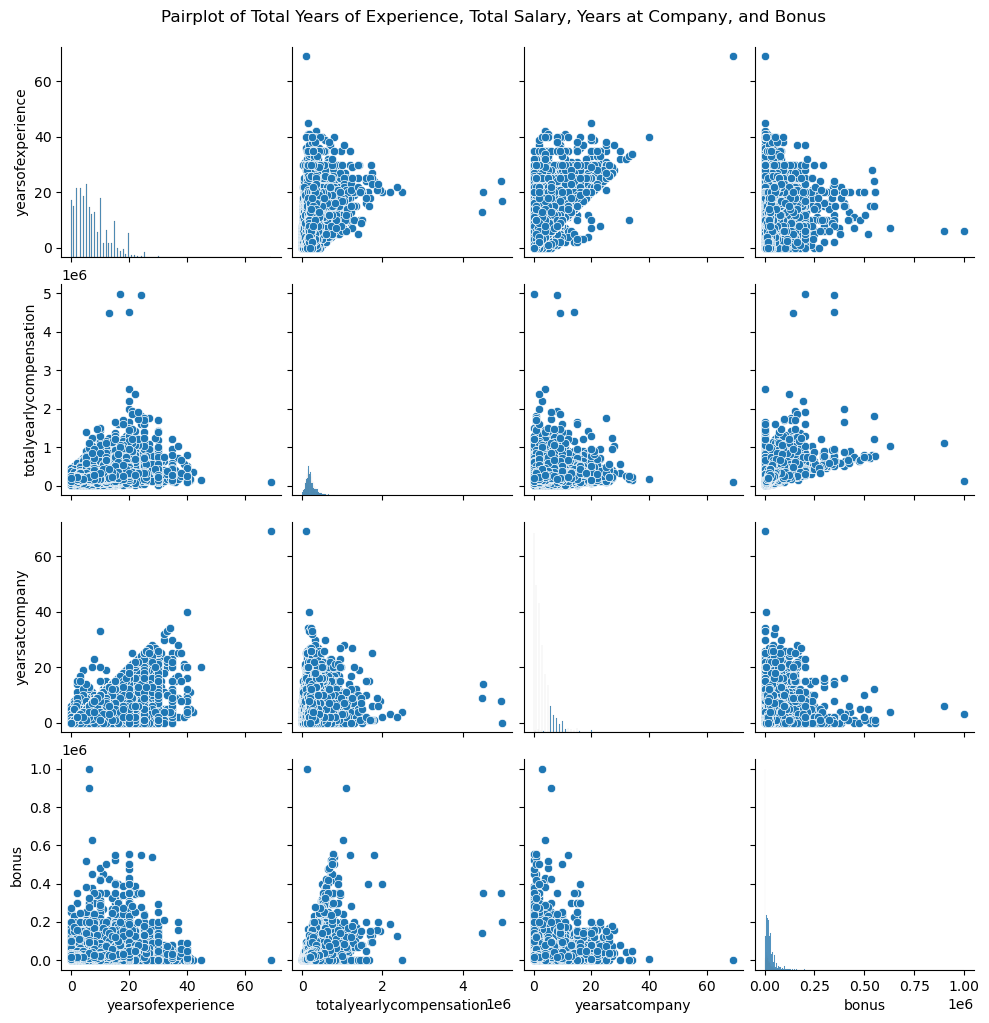

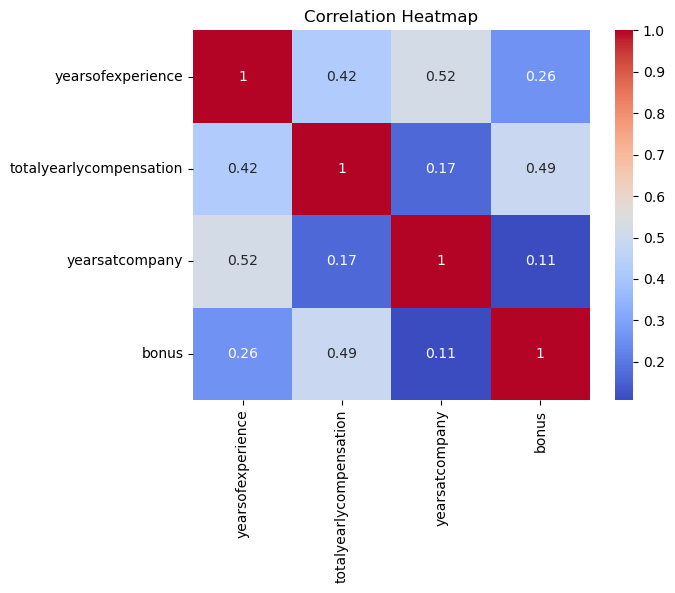

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv(r"C:\Users\carli\Downloads\tech_companies_salary (1).csv")

# Extract relevant columns
data = df[['yearsofexperience', 'totalyearlycompensation', 'yearsatcompany', 'bonus']]

# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.suptitle('Pairplot of Total Years of Experience, Total Salary, Years at Company, and Bonus', y=1.02)
plt.show()

# Heatmap to show correlation between variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


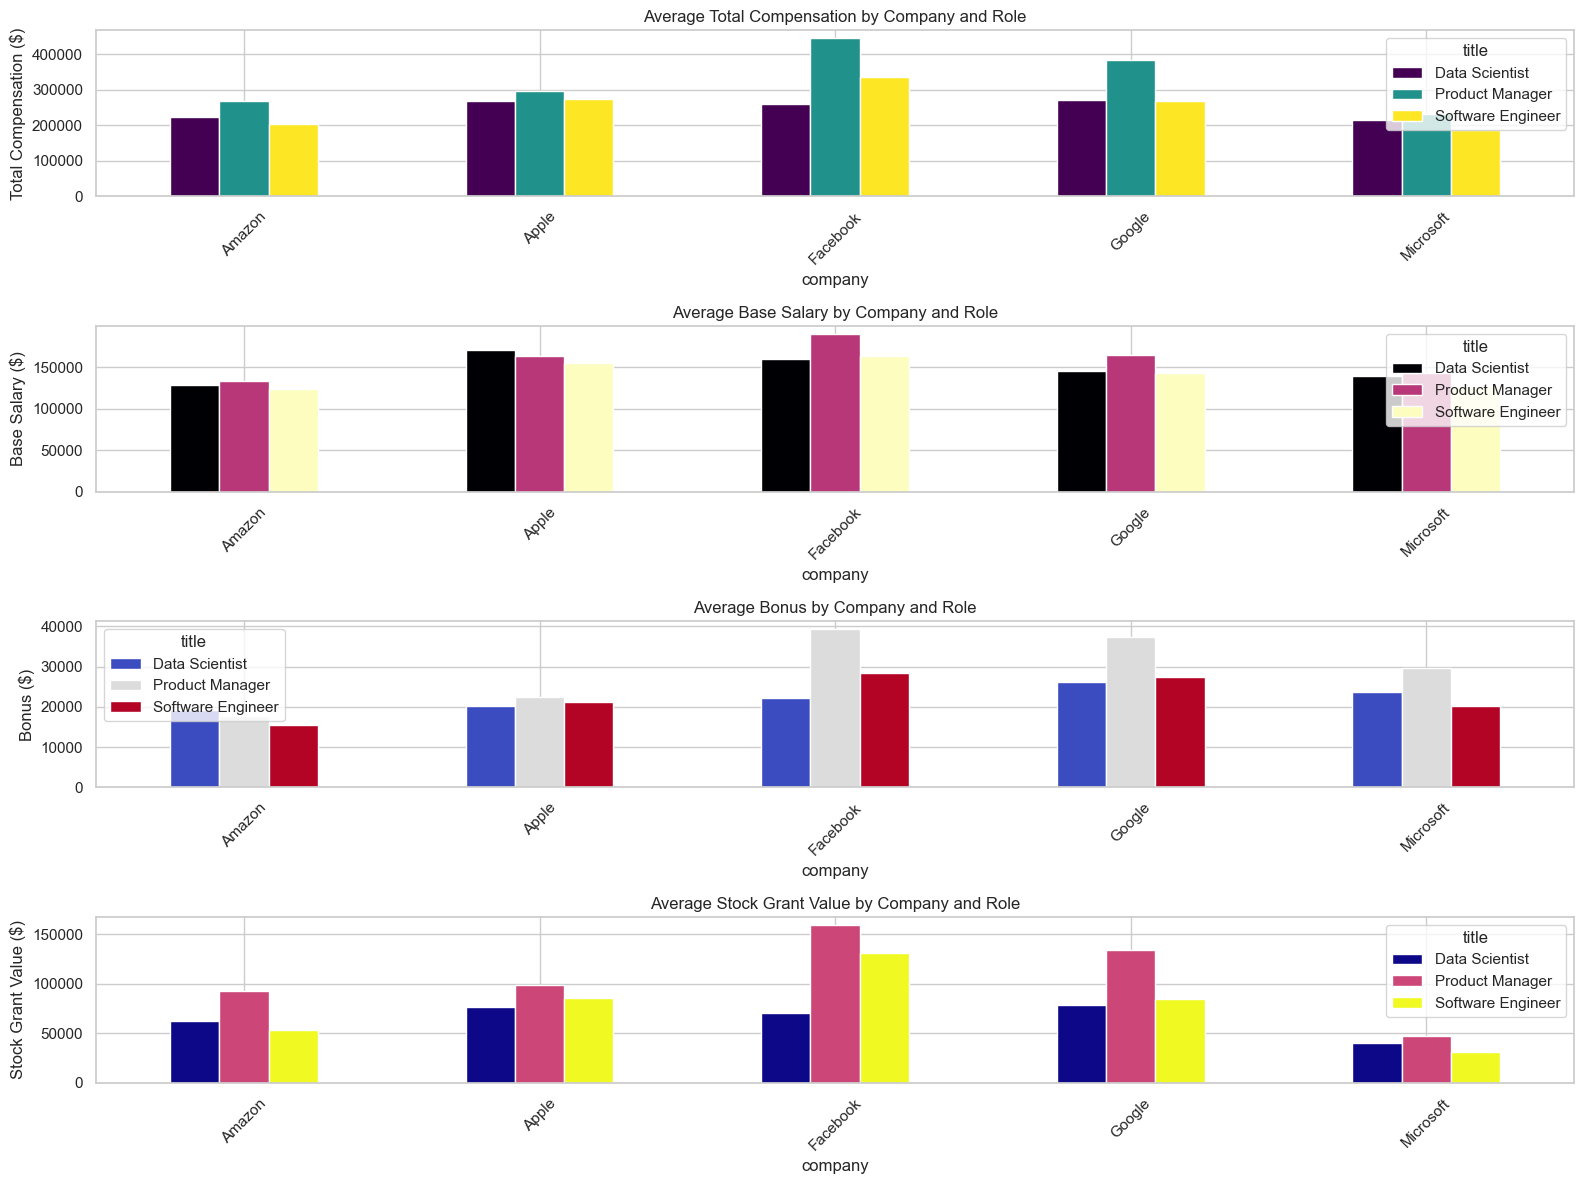

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = (r"C:\Users\carli\Downloads\tech_companies_salary (1).csv")  # Replace with your actual file path
data = pd.read_csv(file_path)

# Filter dataset for the relevant companies and roles, and select necessary columns
filtered_data = data[
    (data['company'].isin(['Amazon', 'Microsoft', 'Google', 'Facebook', 'Apple'])) &
    (data['title'].isin(['Software Engineer', 'Data Scientist', 'Product Manager']))
][['company', 'title', 'totalyearlycompensation', 'yearsofexperience', 'basesalary', 'bonus', 'stockgrantvalue']]

# Set up visualization aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Visualization 1: Average total compensation by company and role
plt.subplot(4, 1, 1)
avg_comp = filtered_data.groupby(['company', 'title'])['totalyearlycompensation'].mean().unstack()
avg_comp.plot(kind='bar', ax=plt.gca(), colormap='viridis')
plt.title('Average Total Compensation by Company and Role')
plt.ylabel('Total Compensation ($)')
plt.xticks(rotation=45)

# Visualization 2: Average base salary by company and role
plt.subplot(4, 1, 2)
avg_base = filtered_data.groupby(['company', 'title'])['basesalary'].mean().unstack()
avg_base.plot(kind='bar', ax=plt.gca(), colormap='magma')
plt.title('Average Base Salary by Company and Role')
plt.ylabel('Base Salary ($)')
plt.xticks(rotation=45)

# Visualization 3: Average bonus by company and role
plt.subplot(4, 1, 3)
avg_bonus = filtered_data.groupby(['company', 'title'])['bonus'].mean().unstack()
avg_bonus.plot(kind='bar', ax=plt.gca(), colormap='coolwarm')
plt.title('Average Bonus by Company and Role')
plt.ylabel('Bonus ($)')
plt.xticks(rotation=45)

# Visualization 4: Average stock grant value by company and role
plt.subplot(4, 1, 4)
avg_stock = filtered_data.groupby(['company', 'title'])['stockgrantvalue'].mean().unstack()
avg_stock.plot(kind='bar', ax=plt.gca(), colormap='plasma')
plt.title('Average Stock Grant Value by Company and Role')
plt.ylabel('Stock Grant Value ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [7]:
# Calculate summary statistics for total yearly compensation by company and role
summary_stats = filtered_data.groupby(['company', 'title'])['totalyearlycompensation'].describe()

# Display summary statistics
print(summary_stats)

                              count           mean            std       min  \
company   title                                                               
Amazon    Data Scientist      257.0  223287.937743   99666.958946   40000.0   
          Product Manager     886.0  267239.277652  114024.911904   54000.0   
          Software Engineer  4978.0  204275.060265   87017.340906   13000.0   
Apple     Data Scientist       78.0  268833.333333   94778.541144   54000.0   
          Product Manager      62.0  297951.612903  192507.902961   83000.0   
          Software Engineer  1198.0  273522.954925  114400.117568   18000.0   
Facebook  Data Scientist      184.0  259478.260870   96309.323867  100000.0   
          Product Manager     206.0  445004.854369  398106.279444   75000.0   
          Software Engineer  1953.0  335065.796211  185293.476784   82000.0   
Google    Data Scientist       89.0  271247.191011  124604.399537  100000.0   
          Product Manager     292.0  383297.945205  